# LIBRARIES

In [95]:
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns
import pandas as pd 
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 99)
sns.set()

# IMPORTING DATA 

In [96]:
data_raw = pd.read_csv('loan_data_2007_2014.csv', index_col=0)

C:\Users\ASUS\AppData\Local\Temp\ipykernel_17332\2969852544.py:1: DtypeWarning: Columns (20) have mixed types. Specify dtype option on import or set low_memory=False.
  data_raw = pd.read_csv('loan_data_2007_2014.csv', index_col=0)


# EXPLORING DATA 

In [97]:
data_raw.shape

(466285, 74)

In [98]:
data_raw.info()

<class 'pandas.core.frame.DataFrame'>
Index: 466285 entries, 0 to 466284
Data columns (total 74 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   id                           466285 non-null  int64  
 1   member_id                    466285 non-null  int64  
 2   loan_amnt                    466285 non-null  int64  
 3   funded_amnt                  466285 non-null  int64  
 4   funded_amnt_inv              466285 non-null  float64
 5   term                         466285 non-null  object 
 6   int_rate                     466285 non-null  float64
 7   installment                  466285 non-null  float64
 8   grade                        466285 non-null  object 
 9   sub_grade                    466285 non-null  object 
 10  emp_title                    438697 non-null  object 
 11  emp_length                   445277 non-null  object 
 12  home_ownership               466285 non-null  object 
 13  annu

In [99]:
data_raw.sample()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_il_6m,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m
282842,30825842,33379015,24525,24525,24525.0,60 months,14.49,576.91,C,C4,Risk manager,10+ years,MORTGAGE,127900.0,Verified,Oct-14,Current,n,https://www.lendingclub.com/browse/loanDetail....,NaN,debt_consolidation,Debt consolidation,276xx,NC,37.48,0.0,Sep-96,1.0,NaN,NaN,15.0,0.0,31927,70.9,31.0,w,20270.29,20270.29,8057.0,8057.0,4254.71,3802.29,0.0,0.0,0.0,Dec-15,576.91,Feb-16,Jan-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0.0,0.0,482843.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,45000.0,NaN,NaN,NaN


In [100]:
print(data_raw.id.nunique())
print(data_raw.member_id.nunique())

466285
466285


All `id` and `member_id` are uniqe and had no duplicate

Remove features that we won't use later on, such as unique id (`id`, `member_id`), free texts (`url`, `desc`), and all null/constant/others

In [101]:
cols_to_drop = [
    # unique id
    'id'
    , 'member_id'
    
    # free text
    , 'url'
    , 'desc'
    
    # all null / constant / others
    , 'zip_code' 
    , 'annual_inc_joint'
    , 'dti_joint'
    , 'verification_status_joint'
    , 'open_acc_6m'
    , 'open_il_6m'
    , 'open_il_12m'
    , 'open_il_24m'
    , 'mths_since_rcnt_il'
    , 'total_bal_il'
    , 'il_util'
    , 'open_rv_12m'
    , 'open_rv_24m'
    , 'max_bal_bc'
    , 'all_util'
    , 'inq_fi'
    , 'total_cu_tl'
    , 'inq_last_12m'
    
    # expert judgment
    , 'sub_grade'
]

In [102]:
data = data_raw.drop(cols_to_drop, axis=1)

In [103]:
data.sample(15)

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,purpose,title,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim
327700,7875,7875,7875.0,36 months,16.29,278.00,D,manager,9 years,RENT,22000.0,Source Verified,Aug-14,Current,n,debt_consolidation,Debt consolidation,IL,27.88,2.0,May-07,1.0,5.0,NaN,16.0,0.0,1089,18.1,32.0,w,2830.51,2830.51,6320.00000,6320.00,5044.49,1275.51,0.0,0.00,0.0000,Jan-16,278.00,Feb-16,Jan-16,0.0,61.0,1,INDIVIDUAL,0.0,0.0,65537.0,6000.0
342912,20000,20000,19900.0,36 months,11.67,661.14,B,Boiler installer/pipe fitter,10+ years,MORTGAGE,91967.0,Source Verified,Jul-14,Current,n,debt_consolidation,Debt consolidation,CO,20.19,2.0,Jan-00,1.0,4.0,NaN,11.0,0.0,8844,65.5,27.0,f,11418.88,11361.79,11239.38000,11183.18,8581.12,2658.26,0.0,0.00,0.0000,Dec-15,661.14,Feb-16,Jan-16,0.0,14.0,1,INDIVIDUAL,0.0,0.0,318667.0,13500.0
165083,35000,35000,34850.0,36 months,11.14,1148.18,B,Department of Defense,7 years,MORTGAGE,94179.0,Verified,Feb-13,Fully Paid,n,home_improvement,First Family Home Re-Build,CA,20.62,0.0,Jan-89,0.0,NaN,NaN,12.0,0.0,29095,51.4,24.0,f,0.00,0.00,41024.74402,40848.93,35000.00,6024.74,0.0,0.00,0.0000,Jun-15,10024.72,NaN,Jan-16,0.0,NaN,1,INDIVIDUAL,0.0,0.0,336526.0,56600.0
122764,18225,18225,18225.0,60 months,15.22,435.68,C,PPG Paints,8 years,RENT,44000.0,Verified,Jul-13,Charged Off,n,debt_consolidation,end in sight,AZ,7.09,0.0,Feb-98,0.0,NaN,114.0,6.0,1.0,7716,63.8,14.0,f,0.00,0.00,4999.19000,4999.19,1261.88,1342.18,0.0,2395.13,23.8511,Jan-14,435.68,NaN,Jun-14,0.0,NaN,1,INDIVIDUAL,0.0,0.0,7716.0,12100.0
5287,12600,12600,12600.0,60 months,16.77,311.59,D,Millennium Laboratories,< 1 year,RENT,97400.0,Source Verified,Oct-11,Fully Paid,n,other,New Job Expenditures adjustment,CA,7.98,2.0,Aug-88,0.0,19.0,NaN,6.0,0.0,2283,87.8,37.0,f,0.00,0.00,15447.25000,15447.25,12600.00,2847.25,0.0,0.00,0.0000,May-13,10171.91,NaN,Jul-15,0.0,NaN,1,INDIVIDUAL,0.0,NaN,NaN,NaN
62572,14000,14000,14000.0,36 months,12.99,471.65,B,Social Worker,1 year,OWN,42000.0,Not Verified,Nov-13,Current,n,debt_consolidation,Consolidate,CT,23.49,0.0,Dec-03,1.0,NaN,NaN,10.0,0.0,13969,61.5,32.0,w,4447.35,4447.35,12262.90000,12262.90,9552.65,2710.25,0.0,0.00,0.0000,Jan-16,471.65,Feb-16,Jan-16,0.0,NaN,1,INDIVIDUAL,0.0,0.0,110247.0,22700.0
406798,6000,6000,6000.0,36 months,12.49,200.70,B,program coordinator,10+ years,RENT,61000.0,Source Verified,Apr-14,Current,n,debt_consolidation,Debt consolidation,NY,16.43,0.0,Dec-02,0.0,NaN,65.0,15.0,1.0,2131,15.8,31.0,w,823.34,823.34,5813.30000,5813.30,5176.66,636.64,0.0,0.00,0.0000,Jan-16,200.70,Jan-16,Jan-16,0.0,NaN,1,INDIVIDUAL,0.0,0.0,46071.0,13500.0
399074,18000,18000,18000.0,36 months,9.67,578.03,B,Nurse,3 years,RENT,75000.0,Source Verified,Apr-14,Fully Paid,n,credit_card,Credit card refinancing,CA,20.99,0.0,Nov-02,0.0,NaN,NaN,14.0,0.0,21000,39.6,30.0,w,0.00,0.00,19297.33000,19297.33,18000.00,1297.33,0.0,0.00,0.0000,Mar-15,14095.06,NaN,Jan-16,0.0,NaN,1,INDIVIDUAL,0.0,0.0,120546.0,53000.0
32017,10000,10000,10000.0,36 months,11.36,329.12,B,Town and Country Liq,8 years,MORTGAGE,60000.0,Not Verified,Feb-10,Fully Paid,n,major_purchase,Buying a business,NJ,8.06,1.0,Feb-01,3.0,7.0,NaN,8.0,0.0,6041,26.7,21.0,f,0.00,0.00,11846.93000,11846.93,9999.99,1846.94,0.0,0.00,0.0000,Mar-13,336.70,NaN,Mar-13,0.0,NaN,1,INDIVIDUAL,0.0,NaN,NaN,NaN
309752,1200,1200,1200.0,36 months,22.15,45.93,E,caseaide,< 1 year,RENT,26000.0,Not Verified,Sep-14,Current,n,other,Oth

# DEFINE TARGET VARIABLE / LABELING

In credit risk modeling, our main goal is to determine wether an individual could pay their debt on time, so our target variable should reflect on the individuals ability to pay.

In this dataset, the variable `loan_status` is the variable that we could use as our target variable because it shows the performance of each individuals history to pay their debt

In [104]:
data.loan_status.value_counts(normalize=True)*100

loan_status
Current                                                48.087757
Fully Paid                                             39.619332
Charged Off                                             9.109236
Late (31-120 days)                                      1.479782
In Grace Period                                         0.674695
Does not meet the credit policy. Status:Fully Paid      0.426349
Late (16-30 days)                                       0.261214
Default                                                 0.178432
Does not meet the credit policy. Status:Charged Off     0.163205
Name: proportion, dtype: float64

Dapat dilihat bahwa variabel `loan_status` memiliki beberapa nilai:

In `loan_status` there are several values:
- `Current` are the payment that are going smoothly
- `Charged off` were the payments that are backlogged and was removed from bookings
- `Late` are the payments that was behind schedule
- `In Grace Period` are the payments that are still within the aggreed period
- `Default` means a backlogged payment

From the few values above, we could determine wether an individual is a `bad loan` or a `good loan`

The definition of good and bad loan might differ based on the industry we are talking about. In this case, we use >30 days as a marker for bad loan

In [105]:
bad_status = [
    'Charged Off' 
    , 'Default' 
    , 'Does not meet the credit policy. Status:Charged Off'
    , 'Late (31-120 days)'
]

data['bad_flag'] = np.where(data['loan_status'].isin(bad_status), 1, 0)

In [106]:
data['bad_flag'].value_counts(normalize=True)*100

bad_flag
0    89.069346
1    10.930654
Name: proportion, dtype: float64

After checking the numbers of good and bad loan, we can see that we have an imbalanced data between good and bad loan

In [107]:
data.drop('loan_status', axis=1, inplace=True)

# CLEANING, PREPROCESSING, FEATURE ENGINEERING

### emp_length

Modify `emp_length`. Ex: 4 years -> 4

In [108]:
data['emp_length'].unique()

array(['10+ years', '< 1 year', '1 year', '3 years', '8 years', '9 years',
       '4 years', '5 years', '6 years', '2 years', '7 years', nan],
      dtype=object)

In [109]:
data['emp_length_int'] = data['emp_length'].str.replace('\+ years', '')
data['emp_length_int'] = data['emp_length_int'].str.replace('< 1 year', str(0))
data['emp_length_int'] = data['emp_length_int'].str.replace(' years', '')
data['emp_length_int'] = data['emp_length_int'].str.replace(' year', '')
data['emp_length_int'] = data['emp_length_int'].str.replace('10+', '10')

In [110]:
data['emp_length_int'] = data['emp_length_int'].astype(float)

In [111]:
data.drop('emp_length', axis=1, inplace=True)

### term

Modify `term`. Ex: 36 months -> 36

In [112]:
data['term'].unique()

array([' 36 months', ' 60 months'], dtype=object)

In [113]:
data['term_int'] = data['term'].str.replace(' months', '')
data['term_int'] = data['term_int'].astype(float)

In [114]:
data.drop('term', axis=1, inplace=True)

### earliest_cr_line

Modifying the `earliest_cr_line` from a month-year format to calculate how much time has passed since that date. To do this, a common approach is to use a reference date = today. However, since this dataset covers the years 2007-2014, it would be more relevant to use a reference date around the year 2017. In this example, I am using the date 2017-12-01 as the reference date.

In [115]:
data['earliest_cr_line'].head(3)

0    Jan-85
1    Apr-99
2    Nov-01
Name: earliest_cr_line, dtype: object

In [116]:
data['earliest_cr_line_date'] = pd.to_datetime(data['earliest_cr_line'], format='%b-%y')
data['earliest_cr_line_date'].head(3)

0   1985-01-01
1   1999-04-01
2   2001-11-01
Name: earliest_cr_line_date, dtype: datetime64[ns]

In [117]:
data['mths_since_earliest_cr_line'] = round(pd.to_numeric((pd.to_datetime('2017-12-01') - data['earliest_cr_line_date']) / np.timedelta64(1, 'M')))
data['mths_since_earliest_cr_line'].head(3)

0    388.0
1    220.0
2    189.0
Name: mths_since_earliest_cr_line, dtype: float64

In [118]:
data['mths_since_earliest_cr_line'].describe()

count    466256.000000
mean        235.142031
std          92.270010
min        -601.000000
25%         180.000000
50%         221.000000
75%         280.000000
max         576.000000
Name: mths_since_earliest_cr_line, dtype: float64

Evaluate the negative value

In [119]:
data[data['mths_since_earliest_cr_line']<0][['earliest_cr_line', 'earliest_cr_line_date', 'mths_since_earliest_cr_line']].head(3)

,earliest_cr_line,earliest_cr_line_date,mths_since_earliest_cr_line
1580,Sep-62,2062-09-01,-527.0
1770,Sep-68,2068-09-01,-598.0
2799,Sep-64,2064-09-01,-551.0


It turns out that the negative value appeared because the function incorrectly interpreted the year 62 as 2062, when it should have been 1962.

To address this issue, further preprocessing can be performed to correct the year 2062 to 1962. However, this time I simply changed negative values to the maximum value of that feature. Since here I know that negative values represent old data (in the 1900s), it still makes sense for me to replace those values with the maximum value.

In [120]:
data.loc[data['mths_since_earliest_cr_line']<0, 'mths_since_earliest_cr_line'] = data['mths_since_earliest_cr_line'].max()

In [121]:
data.drop(['earliest_cr_line', 'earliest_cr_line_date'], axis=1, inplace=True)

### issue_d

Apply the same preprocess method as `earliest_cr_line`

In [122]:
data['issue_d_date'] = pd.to_datetime(data['issue_d'], format='%b-%y')
data['mths_since_issue_d'] = round(pd.to_numeric((pd.to_datetime('2017-12-01') - data['issue_d_date']) / np.timedelta64(1, 'M')))

In [123]:
data['mths_since_issue_d'].describe()

count    466285.000000
mean         50.204806
std          14.190212
min          35.000000
25%          40.000000
50%          46.000000
75%          56.000000
max         124.000000
Name: mths_since_issue_d, dtype: float64

In [124]:
data.drop(['issue_d', 'issue_d_date'], axis=1, inplace=True)

### last_pymnt_d

Apply the same preprocess method as `earliest_cr_line`

In [125]:
data['last_pymnt_d_date'] = pd.to_datetime(data['last_pymnt_d'], format='%b-%y')
data['mths_since_last_pymnt_d'] = round(pd.to_numeric((pd.to_datetime('2017-12-01') - data['last_pymnt_d_date']) / np.timedelta64(1, 'M')))

In [126]:
data['mths_since_last_pymnt_d'].describe()

count    465909.000000
mean         30.916097
std          12.406823
min          23.000000
25%          23.000000
50%          24.000000
75%          34.000000
max         118.000000
Name: mths_since_last_pymnt_d, dtype: float64

In [127]:
data.drop(['last_pymnt_d', 'last_pymnt_d_date'], axis=1, inplace=True)

### next_pymnt_d

Apply the same preprocess method as `earliest_cr_line`

In [128]:
data['next_pymnt_d_date'] = pd.to_datetime(data['next_pymnt_d'], format='%b-%y')
data['mths_since_next_pymnt_d'] = round(pd.to_numeric((pd.to_datetime('2017-12-01') - data['next_pymnt_d_date']) / np.timedelta64(1, 'M')))

In [129]:
data['mths_since_next_pymnt_d'].describe()

count    239071.000000
mean         22.722279
std           5.928592
min          21.000000
25%          22.000000
50%          22.000000
75%          22.000000
max         118.000000
Name: mths_since_next_pymnt_d, dtype: float64

In [130]:
data.drop(['next_pymnt_d', 'next_pymnt_d_date'], axis=1, inplace=True)

### last_credit_pull_d

Apply the same preprocess method as `earliest_cr_line`

In [131]:
data['last_credit_pull_d_date'] = pd.to_datetime(data['last_credit_pull_d'], format='%b-%y')
data['mths_since_last_credit_pull_d'] = round(pd.to_numeric((pd.to_datetime('2017-12-01') - data['last_credit_pull_d_date']) / np.timedelta64(1, 'M')))

In [132]:
data['mths_since_last_credit_pull_d'].describe()

count    466243.000000
mean         26.856223
std           9.303991
min          23.000000
25%          23.000000
50%          23.000000
75%          25.000000
max         125.000000
Name: mths_since_last_credit_pull_d, dtype: float64

In [133]:
data.drop(['last_credit_pull_d', 'last_credit_pull_d_date'], axis=1, inplace=True)

# EXPLORATORY DATA ANALYSIS

### Correlation Check

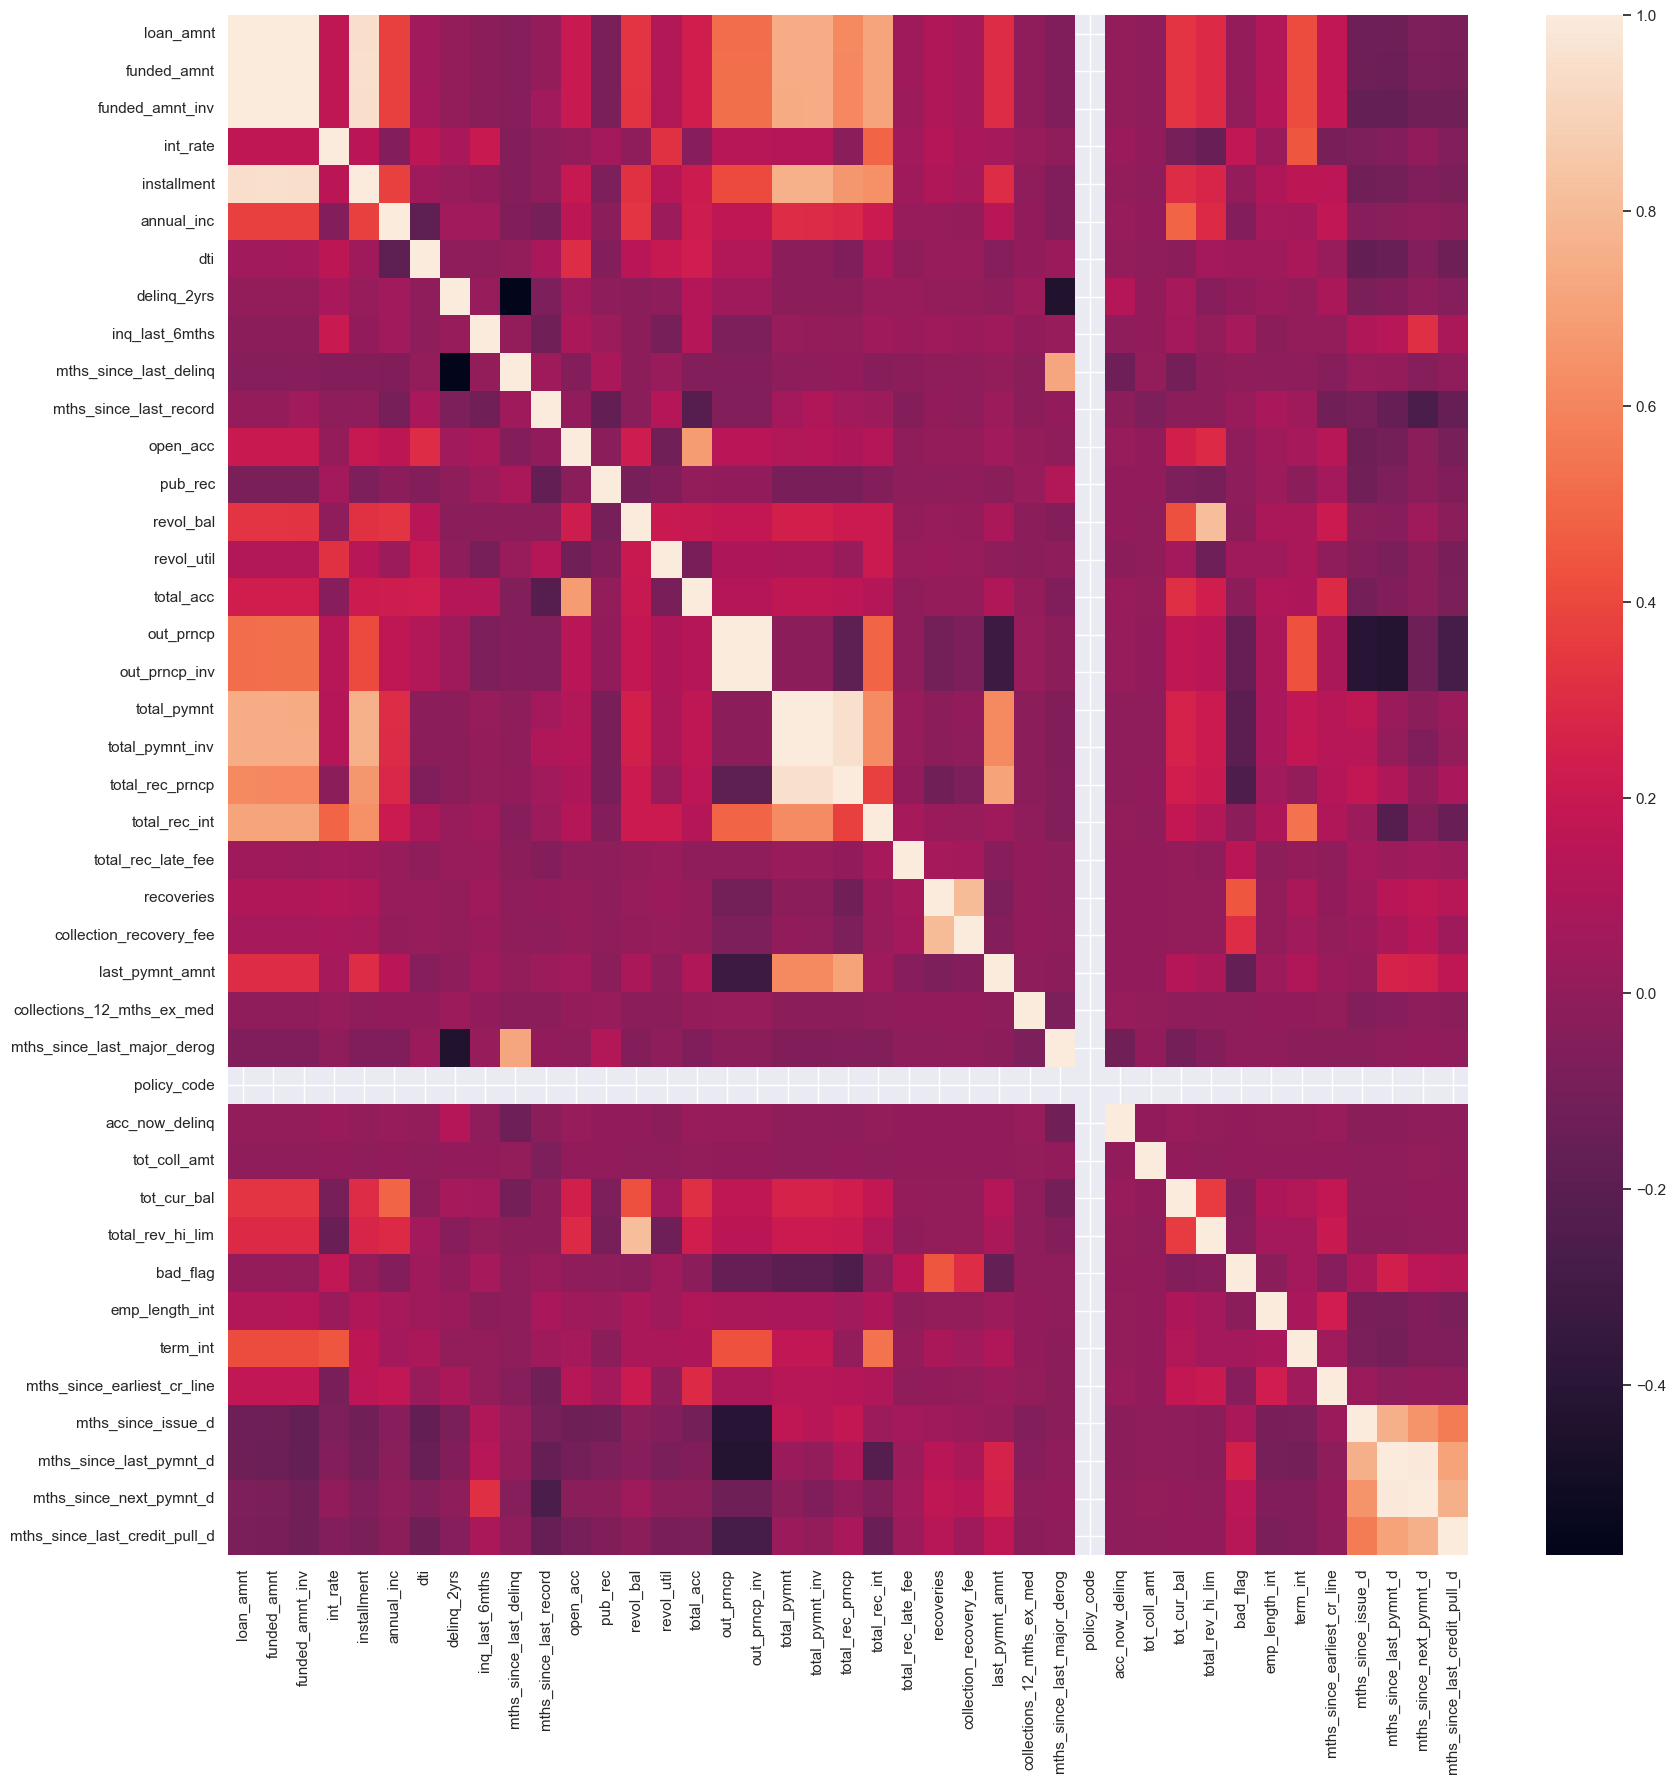

In [134]:
# Select only numeric columns
data_numeric = data.select_dtypes(include=[np.number])

# Create the heatmap
plt.figure(figsize=(20, 20))
sns.heatmap(data_numeric.corr())
plt.show()

If there are pairs of features with high correlations, one of them will be selected. In this case the treshold for high corelation is above 0.7

In [135]:
# Select only numeric columns
data_numeric = data.select_dtypes(include=[np.number])

# Calculate the correlation matrix
corr_matrix = data_numeric.corr().abs()

# Create a mask for high correlation values (e.g., > 0.7)
high_corr_mask = corr_matrix > 0.7

upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))

# Get a list of columns to drop
to_drop_hicorr = [column for column in high_corr_mask.columns if any(high_corr_mask[column])]

# Drop the high correlated columns from the DataFrame
data_numeric_dropped = data_numeric.drop(columns=to_drop_hicorr)



corr_matrix = data.corr().abs()
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))
# to_drop_hicorr = [column for column in upper.columns if any(upper[column] > 0.7)]

In [136]:
to_drop_hicorr

['loan_amnt',
 'funded_amnt',
 'funded_amnt_inv',
 'int_rate',
 'installment',
 'annual_inc',
 'dti',
 'delinq_2yrs',
 'inq_last_6mths',
 'mths_since_last_delinq',
 'mths_since_last_record',
 'open_acc',
 'pub_rec',
 'revol_bal',
 'revol_util',
 'total_acc',
 'out_prncp',
 'out_prncp_inv',
 'total_pymnt',
 'total_pymnt_inv',
 'total_rec_prncp',
 'total_rec_int',
 'total_rec_late_fee',
 'recoveries',
 'collection_recovery_fee',
 'last_pymnt_amnt',
 'collections_12_mths_ex_med',
 'mths_since_last_major_derog',
 'acc_now_delinq',
 'tot_coll_amt',
 'tot_cur_bal',
 'total_rev_hi_lim',
 'bad_flag',
 'emp_length_int',
 'term_int',
 'mths_since_earliest_cr_line',
 'mths_since_issue_d',
 'mths_since_last_pymnt_d',
 'mths_since_next_pymnt_d',
 'mths_since_last_credit_pull_d']

In [137]:
data.drop(to_drop_hicorr, axis=1, inplace=True)

### Check Categorical Features

In [138]:
data.select_dtypes(include='object').nunique()

grade                       7
emp_title              205475
home_ownership              6
verification_status         3
pymnt_plan                  2
purpose                    14
title                   63098
addr_state                 50
initial_list_status         2
application_type            1
dtype: int64

At this stage, features with very high cardinality (a large number of unique values), features with only one unique value are removed.

In [139]:
data.drop(['emp_title', 'title', 'application_type'], axis=1, inplace=True)

In [140]:
data.select_dtypes(exclude='object').nunique()

policy_code    1
dtype: int64

It turns out that, among data types other than `object`, there are also features with only one unique value, so they will also be removed.

In [141]:
data.drop(['policy_code'], axis=1, inplace=True)

In [142]:
for col in data.select_dtypes(include='object').columns.tolist():
    print(data[col].value_counts(normalize=True)*100)
    print('\n')

grade
B    29.365946
C    26.870476
D    16.489486
A    16.056060
E     7.668486
F     2.837106
G     0.712440
Name: proportion, dtype: float64


home_ownership
MORTGAGE    50.586015
RENT        40.420129
OWN          8.943886
OTHER        0.039032
NONE         0.010723
ANY          0.000214
Name: proportion, dtype: float64


verification_status
Verified           36.041262
Source Verified    32.167666
Not Verified       31.791072
Name: proportion, dtype: float64


pymnt_plan
n    99.99807
y     0.00193
Name: proportion, dtype: float64


purpose
debt_consolidation    58.804165
credit_card           22.337626
home_improvement       5.691155
other                  5.080584
major_purchase         2.107724
small_business         1.504016
car                    1.157447
medical                0.986950
moving                 0.642097
vacation               0.533365
wedding                0.502482
house                  0.486612
educational            0.090503
renewable_energy       0.075276


Fitur yang sangat didominasi oleh salah satu nilai saja akan dibuang pada tahap ini.

In [143]:
data.drop('pymnt_plan', axis=1, inplace=True)

# MISSING VALUES

### Missing Value Checking

In [144]:
check_missing = data.isnull().sum() * 100 / data.shape[0]
check_missing[check_missing > 0].sort_values(ascending=False)

Series([], dtype: float64)

Di sini, kolom-kolom dengan missing values di atas 75% dibuang

In [145]:
data.drop('mths_since_last_record', axis=1, inplace=True)

KeyError: "['mths_since_last_record'] not found in axis"

### Missing Values Filling

In [ ]:
data['annual_inc'].fillna(data['annual_inc'].mean(), inplace=True)
data['mths_since_earliest_cr_line'].fillna(0, inplace=True)
data['acc_now_delinq'].fillna(0, inplace=True)
data['total_acc'].fillna(0, inplace=True)
data['pub_rec'].fillna(0, inplace=True)
data['open_acc'].fillna(0, inplace=True)
data['inq_last_6mths'].fillna(0, inplace=True)
data['delinq_2yrs'].fillna(0, inplace=True)
data['collections_12_mths_ex_med'].fillna(0, inplace=True)
data['revol_util'].fillna(0, inplace=True)
data['emp_length_int'].fillna(0, inplace=True)
data['tot_cur_bal'].fillna(0, inplace=True)
data['tot_coll_amt'].fillna(0, inplace=True)
data['mths_since_last_delinq'].fillna(-1, inplace=True)

# FEATURE SCALING AND TRANSFORMATION

### One Hot Encoding

Semua kolom kategorikal dilakukan One Hot Encoding.

In [ ]:
categorical_cols = [col for col in data.select_dtypes(include='object').columns.tolist()]

In [ ]:
onehot = pd.get_dummies(data[categorical_cols], drop_first=True)

In [ ]:
onehot.head()

,grade_B,grade_C,grade_D,grade_E,grade_F,grade_G,home_ownership_MORTGAGE,home_ownership_NONE,home_ownership_OTHER,home_ownership_OWN,home_ownership_RENT,verification_status_Source Verified,verification_status_Verified,purpose_credit_card,purpose_debt_consolidation,purpose_educational,purpose_home_improvement,purpose_house,purpose_major_purchase,purpose_medical,purpose_moving,purpose_other,purpose_renewable_energy,purpose_small_business,purpose_vacation,purpose_wedding,addr_state_AL,addr_state_AR,addr_state_AZ,addr_state_CA,addr_state_CO,addr_state_CT,addr_state_DC,addr_state_DE,addr_state_FL,addr_state_GA,addr_state_HI,addr_state_IA,addr_state_ID,addr_state_IL,addr_state_IN,addr_state_KS,addr_state_KY,addr_state_LA,addr_state_MA,addr_state_MD,addr_state_ME,addr_state_MI,addr_state_MN,addr_state_MO,addr_state_MS,addr_state_MT,addr_state_NC,addr_state_NE,addr_state_NH,addr_state_NJ,addr_state_NM,addr_state_NV,addr_state_NY,addr_state_OH,addr_state_OK,addr_state_OR,addr_state_PA,addr_state_RI,addr_state_SC,addr_state_SD,addr_state_TN,addr_state_TX,addr_state_UT,addr_state_VA,addr_state_VT,addr_state_WA,addr_state_WI,addr_state_WV,addr_state_WY,initial_list_status_w
0,1,0,0,0,0,0,0,0,0,0,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,1,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,1,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0


### Standardization

Semua kolom numerikal dilakukan proses standarisasi dengan StandardScaler.

In [ ]:
numerical_cols = [col for col in data.columns.tolist() if col not in categorical_cols + ['bad_flag']]

In [ ]:
from sklearn.preprocessing import StandardScaler

ss = StandardScaler()
std = pd.DataFrame(ss.fit_transform(data[numerical_cols]), columns=numerical_cols)

In [ ]:
std.head()

,loan_amnt,int_rate,annual_inc,dti,delinq_2yrs,inq_last_6mths,mths_since_last_delinq,open_acc,pub_rec,revol_bal,revol_util,total_acc,out_prncp,total_rec_late_fee,recoveries,collections_12_mths_ex_med,acc_now_delinq,tot_coll_amt,tot_cur_bal,emp_length_int,term_int,mths_since_earliest_cr_line,mths_since_issue_d
0,-1.124392,-0.729587,-0.896551,1.328632,-0.357012,0.178920,-0.708792,-1.641166,-0.31429,-0.124888,1.159498,-1.384557,-0.693944,-0.123464,-0.154549,-0.083608,-0.058307,-0.012089,-0.792648,1.138605,-0.616225,1.764941,1.446626
1,-1.426088,0.330634,-0.787387,-2.065791,-0.357012,3.843328,-0.708792,-1.641166,-0.31429,-0.703378,-1.965980,-1.815538,-0.693944,-0.123464,0.057470,-0.083608,-0.058307,-0.012089,-0.792648,-1.523744,1.622784,-0.212426,1.446626
2,-1.438156,0.488979,-1.110294,-1.082491,-0.357012,1.095022,-0.708792,-1.841641,-0.31429,-0.642003,1.782070,-1.298361,-0.693944,-0.123464,-0.154549,-0.083608,-0.058307,-0.012089,-0.792648,1.138605,-0.616225,-0.570896,1.446626
3,-0.521001,-0.077850,-0.438063,0.354248,-0.357012,0.178920,0.860811,-0.237839,-0.31429,-0.514224,-1.478018,1.028934,-0.693944,3.099264,-0.154549,-0.083608,-0.058307,-0.012089,-0.792648,1.138605,-0.616225,0.226989,1.446626
4,-1.365749,-0.261438,0.122311,0.091865,-0.357012,-0.737182,0.991612,0.764538,-0.31429,0.558748,-0.094058,1.115130,-0.573268,-0.123464,-0.154549,-0.083608,-0.058307,-0.012089,-0.792648,-1.257509,1.622784,0.238553,1.446626


### Transformed Dataframe

Menggabungkan kembali kolom-kolom hasil transformasi 

In [ ]:
data_model = pd.concat([onehot, std, data[['bad_flag']]], axis=1)

# MODELING

### Train-Test Split

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X = data_model.drop('bad_flag', axis=1)
y = data_model['bad_flag']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
X_train.shape, X_test.shape

((373028, 99), (93257, 99))

### Training

Pada contoh ini digunakan algoritma Random Forest untuk pemodelan.

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
rfc = RandomForestClassifier(max_depth=4)
rfc.fit(X_train, y_train)

RandomForestClassifier(max_depth=4)

Feature Importance dapat ditampilkan.

In [ ]:
arr_feature_importances = rfc.feature_importances_
arr_feature_names = X_train.columns.values
    
df_feature_importance = pd.DataFrame(index=range(len(arr_feature_importances)), columns=['feature', 'importance'])
df_feature_importance['feature'] = arr_feature_names
df_feature_importance['importance'] = arr_feature_importances
df_all_features = df_feature_importance.sort_values(by='importance', ascending=False)
df_all_features

,feature,importance
90,recoveries,5.462352e-01
88,out_prncp,1.458328e-01
89,total_rec_late_fee,8.124849e-02
77,int_rate,7.669942e-02
98,mths_since_issue_d,3.419482e-02
3,grade_E,1.603792e-02
4,grade_F,1.470045e-02
96,term_int,1.205325e-02
78,annual_inc,9.150181e-03
94,tot_cur_bal,8.834228e-03


### Validation

Untuk mengukur performa model, dua metrik yang umum dipakai dalam dunia credit risk adalah AUC dan KS.

In [ ]:
y_pred_proba = rfc.predict_proba(X_test)[:][:,1]

df_actual_predicted = pd.concat([pd.DataFrame(np.array(y_test), columns=['y_actual']), pd.DataFrame(y_pred_proba, columns=['y_pred_proba'])], axis=1)
df_actual_predicted.index = y_test.index

#### AUC 

In [ ]:
from sklearn.metrics import roc_curve, roc_auc_score

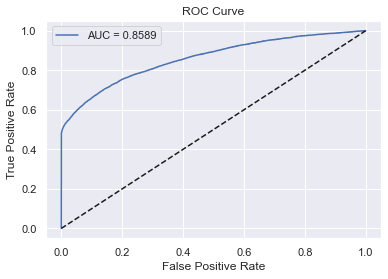

In [ ]:
fpr, tpr, tr = roc_curve(df_actual_predicted['y_actual'], df_actual_predicted['y_pred_proba'])
auc = roc_auc_score(df_actual_predicted['y_actual'], df_actual_predicted['y_pred_proba'])

plt.plot(fpr, tpr, label='AUC = %0.4f' %auc)
plt.plot(fpr, fpr, linestyle = '--', color='k')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()

#### KS 

In [ ]:
df_actual_predicted = df_actual_predicted.sort_values('y_pred_proba')
df_actual_predicted = df_actual_predicted.reset_index()

df_actual_predicted['Cumulative N Population'] = df_actual_predicted.index + 1
df_actual_predicted['Cumulative N Bad'] = df_actual_predicted['y_actual'].cumsum()
df_actual_predicted['Cumulative N Good'] = df_actual_predicted['Cumulative N Population'] - df_actual_predicted['Cumulative N Bad']
df_actual_predicted['Cumulative Perc Population'] = df_actual_predicted['Cumulative N Population'] / df_actual_predicted.shape[0]
df_actual_predicted['Cumulative Perc Bad'] = df_actual_predicted['Cumulative N Bad'] / df_actual_predicted['y_actual'].sum()
df_actual_predicted['Cumulative Perc Good'] = df_actual_predicted['Cumulative N Good'] / (df_actual_predicted.shape[0] - df_actual_predicted['y_actual'].sum())

In [ ]:
df_actual_predicted.head()

,index,y_actual,y_pred_proba,Cumulative N Population,Cumulative N Bad,Cumulative N Good,Cumulative Perc Population,Cumulative Perc Bad,Cumulative Perc Good
0,294816,0,0.043598,1,0,1,0.000011,0.0,0.000012
1,271774,0,0.043755,2,0,2,0.000021,0.0,0.000024
2,279378,0,0.043784,3,0,3,0.000032,0.0,0.000036
3,322307,0,0.043965,4,0,4,0.000043,0.0,0.000048
4,374007,0,0.043972,5,0,5,0.000054,0.0,0.000060


Text(0.5, 1.0, 'Kolmogorov-Smirnov:  0.5634')

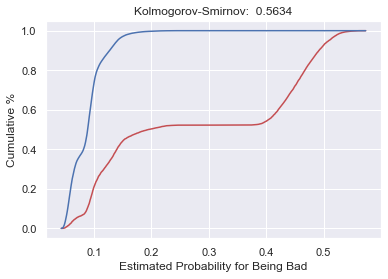

In [ ]:
KS = max(df_actual_predicted['Cumulative Perc Good'] - df_actual_predicted['Cumulative Perc Bad'])

plt.plot(df_actual_predicted['y_pred_proba'], df_actual_predicted['Cumulative Perc Bad'], color='r')
plt.plot(df_actual_predicted['y_pred_proba'], df_actual_predicted['Cumulative Perc Good'], color='b')
plt.xlabel('Estimated Probability for Being Bad')
plt.ylabel('Cumulative %')
plt.title('Kolmogorov-Smirnov:  %0.4f' %KS)

Model yang dibangun menghasilkan performa `AUC = 0.857` dan `KS = 0.56`. Pada dunia credit risk modeling, umumnya AUC di atas 0.7 dan KS di atas 0.3 sudah termasuk performa yang baik.

# SARAN

Beberapa hal lain yang dapat dilakukan untuk project ini:

- Jika menginginkan interpretabilitas yang lebih tinggi, dapat mempertimbangkan untuk membuat Credit Scorecard dengan menggunakan algoritma Logistic Regression dengan pendekatan-pendekatannya seperti Feature Selection menggunakan Information Value dan Feature Engineering menggunakan Weight of Evidence.

- Jika interpretabilitas tidak terlalu dibutuhkan, dapat mempertimbangkan untuk mencoba algoritma-algoritma Machine Learning lainnya seperti Boosting.

- Melakukan hyperparameter tuning.

- Melakukan pemeriksaan atau memastikan bahwa model yang telah dibuat tidak overfitting. Hal ini dapat dilakukan dengan mencoba membandingkan hasil performa model ketika diprediksi terhadap data training dan ketika diprediksi terhadap data testing.

- Umumnya, langkah yang lebih tepat adalah melakukan Train-Test Split terlebih dahulu sebelum melakukan transformasi fitur seperti encoding atau scaling. Namun, karena alasan simplisitas contoh ini melakukan sebaliknya karena umumnya perbedaan performa juga tidak terlalu berbeda.